<font font color='red' size="6"> **I/ Scrapping Tweet with Tweepy** </font>

### Install some of the packages for Tweepy, textblob and processor 
#### Tweepy
conda install -c conda-forge tweepy

#### Textblob 
conda install -c conda-forge textblob

#### Preprocessor
pip install tweet-preprocessor

In [32]:
#Import liberaries
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import tweepy
import json
import pandas as pd
import csv
import re
from textblob import TextBlob
import string
import preprocessor as p
import os
import time
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from PIL import Image

In [4]:
consumer_key = 'XXLWUovfZuT6OjRdfbDC3P1md'
consumer_secret = '0GN3jNA9YGEpeidokjLrY83arvtnfYbGIUaOA79Fvv8xlAa13f'
access_token = '1044960440722186240-J9izxtP3zW0RoFFSwWwpEj7K7PQTZF'
access_token_secret = 'jutX7iHISlgu9qGzTxqusaUEJ6gu5VuxgREq3S7p2voRZ'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [5]:
def scraptweets(text_query):
    count = 3000
    try:
     # Creation of query method using parameters and filter out the retweets
     tweets = tweepy.Cursor(api.search,q=text_query +'-filter:retweets', 
                    Since="2020-09-01", 
                    until="2020-10-31", 
                    lang="en").items(count)
                                                    #Pick only tweets in English and not 
 
     # Pulling information from tweets iterable object
     tweets_list = [[tweet.user.screen_name, tweet.user.location , tweet.text,
                    tweet.user.friends_count, tweet.user.followers_count,tweet.user.statuses_count,
                   tweet.user.created_at,tweet.created_at,tweet.retweet_count, tweet.entities['hashtags'] ] for tweet in tweets]
 
     # Creation of dataframe from tweets list
     # Add or remove columns as you remove tweet information
     tweets_df = pd.DataFrame(tweets_list)
 
    except BaseException as e:
        print('failed on_status,',str(e))
        time.sleep(3)
    

    #Change the header of the file 
    tweets_df = tweets_df.rename(columns={0: 'User',1: 'Location', 2: 'Tweet',
                     3: 'Num of Friend',4: 'Num of Followers',5:'Total Tweets by user',
                     6: 'Account Created at',7: 'Tweet Created at',8: 'Num of Retweet',9: 'hashtags in the tweet'})


    #Save into csv file with hashtag stamp
    path = os.getcwd()
    filename = path + '/data/' + 'US2020Election_' + text_query +'.csv'        #Put the name of hashtag upi just create
    tweets_df.to_csv(filename, index = False, encoding='utf-8')
    

In [ ]:
#Run the Function above to get the dataset you always need
Twitter_hastag = ["#election","#politics","#vote","#2020election","#biden","#joebiden","#democrats","#trump", "#maga", "#republican"] 
for i in Twitter_hastag:
    scraptweets(i)

<font font color='red' size="6"> **II/ Prior Cleaning** </font>

<font font color='blue' size="5"> **1) Brief Cleaning** </font>

In [6]:
#Import libraries 

import numpy as np
import pandas as pd
import os

# Word processing libraries
import re
from nltk.corpus import wordnet
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

# Widen the size of each cell
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [7]:
#Import the dataset that we created 
tweets_1st = pd.read_csv(os.getcwd() + '/data/' + '/US2020Election_#2020election.csv')
tweets_2nd = pd.read_csv(os.getcwd() + '/data/' + '/US2020Election_#biden.csv')
tweets_3rd = pd.read_csv(os.getcwd() + '/data/' + '/US2020Election_#democrats.csv')
tweets_4th = pd.read_csv(os.getcwd() + '/data/' + '/US2020Election_#election.csv')
tweets_5th = pd.read_csv(os.getcwd() + '/data/' + '/US2020Election_#joebiden.csv')
tweets_6th = pd.read_csv(os.getcwd() + '/data/' + '/US2020Election_#maga.csv')
tweets_7th = pd.read_csv(os.getcwd() + '/data/' + '/US2020Election_#politics.csv')
tweets_8th = pd.read_csv(os.getcwd() + '/data/' + '/US2020Election_#republican.csv')
tweets_9th = pd.read_csv(os.getcwd() + '/data/' + '/US2020Election_#trump.csv')
tweets_10th = pd.read_csv(os.getcwd() + '/data/' + '/US2020Election_#vote.csv')
Tweet_files = [tweets_1st,tweets_2nd,tweets_3rd,tweets_4th,tweets_5th,tweets_6th,tweets_7th,tweets_8th,tweets_9th,tweets_10th] 

In [8]:
# Check the shape of dataset
b = 0 
for a in Tweet_files:
    b = b+1
    print('Size of set', b, 'is: ', a.shape ) 

Size of set 1 is:  (3000, 10)
Size of set 2 is:  (3000, 10)
Size of set 3 is:  (2985, 10)
Size of set 4 is:  (3000, 10)
Size of set 5 is:  (3000, 10)
Size of set 6 is:  (3000, 10)
Size of set 7 is:  (2914, 10)
Size of set 8 is:  (3108, 10)
Size of set 9 is:  (3000, 10)
Size of set 10 is:  (3000, 10)


In [9]:
# Summary statistics
b = 0 
for a in Tweet_files:
    b = b+1
    print(a.info())
    print('------------------------------------------------------------------' ) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   User                   3000 non-null   object
 1   Location               2281 non-null   object
 2   Tweet                  3000 non-null   object
 3   Num of Friend          3000 non-null   int64 
 4   Num of Followers       3000 non-null   int64 
 5   Total Tweets by user   3000 non-null   int64 
 6   Account Created at     3000 non-null   object
 7   Tweet Created at       3000 non-null   object
 8   Num of Retweet         3000 non-null   int64 
 9   hashtags in the tweet  3000 non-null   object
dtypes: int64(4), object(6)
memory usage: 234.5+ KB
None
------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 

In [10]:
#Concat all the files together 
data = pd.concat([tweets_1st,tweets_2nd,tweets_3rd,tweets_4th,tweets_5th,tweets_6th,tweets_7th,tweets_8th,tweets_9th,tweets_10th])
    
print('Size of concatenated dataset is:', data.shape)

# Reset_index
data.reset_index(inplace = True, drop = True)
data.head()
print(data.info())

Size of concatenated dataset is: (30007, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30007 entries, 0 to 30006
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   User                   30007 non-null  object
 1   Location               21763 non-null  object
 2   Tweet                  30007 non-null  object
 3   Num of Friend          30007 non-null  int64 
 4   Num of Followers       30007 non-null  int64 
 5   Total Tweets by user   30007 non-null  int64 
 6   Account Created at     30007 non-null  object
 7   Tweet Created at       30007 non-null  object
 8   Num of Retweet         30007 non-null  int64 
 9   hashtags in the tweet  30007 non-null  object
dtypes: int64(4), object(6)
memory usage: 2.3+ MB
None


<font font color='blue' size="5"> **2) Process the Column 'Tweet'** </font>

In [11]:
#Checking for duplicates and removing them. Each user can post many times per day so we do not really care that much about the name.
#We only drop the most identical ones 
print('Initial size of dataset before dropping duplicated rows:', data.shape)
print('-------------------------------------------------------------------------')

data.drop_duplicates(keep = False, inplace = True)
print('Current size of dataset after dropping duplicated rows, if any, is:', data.shape)
print(data.head())

Initial size of dataset before dropping duplicated rows: (30007, 10)
-------------------------------------------------------------------------
Current size of dataset after dropping duplicated rows, if any, is: (29047, 10)
            User         Location  \
0    thekumachan              NaN   
1  2020Followers  Washington D.C.   
2  2020Followers  Washington D.C.   
3  2020Followers  Washington D.C.   
4  2020Followers  Washington D.C.   

                                               Tweet  Num of Friend  \
0  Kamala Harris Knows How to Win Contest\nhttps:...             23   
1  realDonaldTrump gained 3,412 Twitter followers...              1   
2  JoeBiden gained 11,515 Twitter followers in th...              1   
3  Mike_Pence gained 1,684 Twitter followers in t...              1   
4  KamalaHarris gained 7,302 Twitter followers in...              1   

   Num of Followers  Total Tweets by user   Account Created at  \
0                60                  4218  2009-08-21 22:01:5

In [12]:
# Define function to sieve out @users in a tweet:
def mentioned_users(string):
    usernames = re.findall('@[^\s]+', string)
    return usernames


# Create a new column and apply the function on the column 'text'
data['mentioned_users'] = data['Tweet'].apply(lambda x: mentioned_users(x))
data.head(20)

,User,Location,Tweet,Num of Friend,Num of Followers,Total Tweets by user,Account Created at,Tweet Created at,Num of Retweet,hashtags in the tweet,mentioned_users
0,thekumachan,NaN,Kamala Harris Knows How to Win Contest\nhttps:...,23,60,4218,2009-08-21 22:01:59,2020-10-26 23:00:31,0,"[{'text': '2020Campaign', 'indices': [64, 77]}...",[]
1,2020Followers,Washington D.C.,"realDonaldTrump gained 3,412 Twitter followers...",1,31,6642,2019-12-30 23:45:24,2020-10-26 23:00:21,0,[],[]
2,2020Followers,Washington D.C.,"JoeBiden gained 11,515 Twitter followers in th...",1,31,6642,2019-12-30 23:45:24,2020-10-26 23:00:21,0,[],[]
3,2020Followers,Washington D.C.,"Mike_Pence gained 1,684 Twitter followers in t...",1,31,6642,2019-12-30 23:45:24,2020-10-26 23:00:21,0,[],[]
4,2020Followers,Washington D.C.,"KamalaHarris gained 7,302 Twitter followers in...",1,31,6642,2019-12-30 23:45:24,2020-10-26 23:00:21,0,[],[]
5,VoterFeed_USA,"Lewes, Delaware, USA",Comparing political candidates is easy on @Vot...,508,27,113,2019-08-27 01:47:48,2020-10-26 23:00:01,0,[],[@VoterFeed_USA]
6,ProgressNow_NC,North Carolina,"Along with New Hampshire, North Carolina is th...",2340,9440,13944,2011-09-12 12:05:08,2020-10-26 23:00:00,0,[],[]
7,Russell_Arch,"Los Angeles, CA","28 years ago, James Carville summed up the 199...",379,550,14858,2009-01-15 03:02:08,2020-10-26 22:59:56,0,[],[]
8,cackalacky1968,NaN,I feel pretty confident in this. Maybe PA goes...,1517,122,19485,2016-07-17 15:47:07,2020-10-26 22:59:37,0,[],[]
9,gardengirl125,Tubac Az,I’ve been keeping my fears and anxiety in chec...,3204,3111,8744,2016-12-01 16:35:44,2020-10-26 22:58:53,0,[],[]


In [13]:
# Define Emoji_patterns
emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)



#Define the main function to clean text in various ways
def clean_text(text):
    text = re.sub('@[^\s]+', '', text)                                      #Remove surname
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', text)            #Remove all the URLs
    text = re.sub(r'#([^\s]+)', '', text)                                   #Remove hashtags entirely i.e. #hashtags
    text = emoji_pattern.sub(r'',text)                                      #Remove emojis if we have any
    text = text.lower()                                                     #lowercase the text 
    text = [word.strip(string.punctuation) for word in text.split(" ")]     #Tokenize text and remove punctuation 
    text = [word for word in text if not any (c.isdigit() for c in word)]   #Remove number
    text = [x for x in text if x not in set(stopwords.words('english'))]    #Remove stop words in English 
    text = [t for t in text if len(t) > 0]                                  #Remove empty tokens 
    text = [t for t in text if len(t) > 1]                                  #Remove words with only one letter 
    text = " ".join(text)                                                   #Join them all together  

    return(text)
    

In [14]:
#Apply the function on the column "Tweet":
data['cleaned_Tweet'] = data['Tweet'].apply(lambda x: clean_text(x))
data.head()

,User,Location,Tweet,Num of Friend,Num of Followers,Total Tweets by user,Account Created at,Tweet Created at,Num of Retweet,hashtags in the tweet,mentioned_users,cleaned_Tweet
0,thekumachan,NaN,Kamala Harris Knows How to Win Contest\nhttps:...,23,60,4218,2009-08-21 22:01:59,2020-10-26 23:00:31,0,"[{'text': '2020Campaign', 'indices': [64, 77]}...",[],kamala harris knows win contest\n\n\n
1,2020Followers,Washington D.C.,"realDonaldTrump gained 3,412 Twitter followers...",1,31,6642,2019-12-30 23:45:24,2020-10-26 23:00:21,0,[],[],realdonaldtrump gained twitter followers last ...
2,2020Followers,Washington D.C.,"JoeBiden gained 11,515 Twitter followers in th...",1,31,6642,2019-12-30 23:45:24,2020-10-26 23:00:21,0,[],[],joebiden gained twitter followers last hours i...
3,2020Followers,Washington D.C.,"Mike_Pence gained 1,684 Twitter followers in t...",1,31,6642,2019-12-30 23:45:24,2020-10-26 23:00:21,0,[],[],mike_pence gained twitter followers last hours...
4,2020Followers,Washington D.C.,"KamalaHarris gained 7,302 Twitter followers in...",1,31,6642,2019-12-30 23:45:24,2020-10-26 23:00:21,0,[],[],kamalaharris gained twitter followers last hou...


In [15]:
#Check the shape again the rest_index 
print(data.shape)
data.reset_index(inplace = True, drop= True)

#Check out data.tail() to validate index has been reset
data.tail()

(29047, 12)


,User,Location,Tweet,Num of Friend,Num of Followers,Total Tweets by user,Account Created at,Tweet Created at,Num of Retweet,hashtags in the tweet,mentioned_users,cleaned_Tweet
29042,ByDionne,NaN,💚🙌😀🥳😇🙏Let's Win This!! #VoteEarly #VOTE Let's...,2961,1743,10803,2012-05-07 12:29:39,2020-10-26 21:02:58,0,"[{'text': 'VoteEarly', 'indices': [23, 33]}, {...",[],🥳let's win let's get back
29043,Iamjasbirkaur,"Olney, MD",Saving democracy! \n#VOTE #VoteHimOut2020 #Vot...,622,359,3432,2014-07-19 15:43:08,2020-10-26 21:02:56,0,"[{'text': 'VOTE', 'indices': [19, 24]}, {'text...",[],saving democracy
29044,enelson6,NaN,@CornynResponse @JohnCornyn @mjhegar #Vote @mj...,1057,413,21866,2009-01-02 12:22:53,2020-10-26 21:02:54,0,"[{'text': 'Vote', 'indices': [37, 42]}]","[@CornynResponse, @JohnCornyn, @mjhegar, @mjhe...",john cornyn buy bending trumps family
29045,ethannichtern,NaN,Happiness: Noun. \n\nThat feeling where you ar...,939,13441,27261,2009-03-11 21:56:10,2020-10-26 21:02:53,1,[],[],happiness noun \n\nthat feeling text banking a...
29046,LdyDisney,"Fort Pierce, FL",Get out there and #VoteHimOut2020 #VoteEarly #...,14301,14217,107340,2008-08-01 01:54:46,2020-10-26 21:02:48,0,"[{'text': 'VoteHimOut2020', 'indices': [18, 33...",[],get


<font font color='blue' size="5"> **3) Process the Column 'hasthtags' and Column 'Location'** </font>

In [16]:
#Import ast to convert a string representation of list to list 
#The column hashtags is affected 
import ast 

#Define a function to convert a string reps of list to list 
## Function should also handle NaN values after conversion 
def strlist_to_list(text):
    #Remove NaN
    if pd.isnull(text) == True: # if true 
        text = ''
    else: 
        text = ast.literal_eval(text)
    return text

In [17]:
# Apply strlist_to_list(...) to the column 'hashtags'
# Note that doing so will return a list of dictionaries, where there will be one dictionary for each hashtag in a single tweet.

data['hashtags in the tweet'] = data['hashtags in the tweet'].apply(lambda x: strlist_to_list(x))
data.head()

,User,Location,Tweet,Num of Friend,Num of Followers,Total Tweets by user,Account Created at,Tweet Created at,Num of Retweet,hashtags in the tweet,mentioned_users,cleaned_Tweet
0,thekumachan,NaN,Kamala Harris Knows How to Win Contest\nhttps:...,23,60,4218,2009-08-21 22:01:59,2020-10-26 23:00:31,0,"[{'text': '2020Campaign', 'indices': [64, 77]}...",[],kamala harris knows win contest\n\n\n
1,2020Followers,Washington D.C.,"realDonaldTrump gained 3,412 Twitter followers...",1,31,6642,2019-12-30 23:45:24,2020-10-26 23:00:21,0,[],[],realdonaldtrump gained twitter followers last ...
2,2020Followers,Washington D.C.,"JoeBiden gained 11,515 Twitter followers in th...",1,31,6642,2019-12-30 23:45:24,2020-10-26 23:00:21,0,[],[],joebiden gained twitter followers last hours i...
3,2020Followers,Washington D.C.,"Mike_Pence gained 1,684 Twitter followers in t...",1,31,6642,2019-12-30 23:45:24,2020-10-26 23:00:21,0,[],[],mike_pence gained twitter followers last hours...
4,2020Followers,Washington D.C.,"KamalaHarris gained 7,302 Twitter followers in...",1,31,6642,2019-12-30 23:45:24,2020-10-26 23:00:21,0,[],[],kamalaharris gained twitter followers last hou...


In [18]:
# Since each 'hashtag' contain a list of dictionaries, we need to loop through the list to extract the actual hashtags in the tweets.
# Define a function to perform this extraction:
def extract_hashtags(hashtag_list):
    # argument:
    # hashtag_list - a list of dictionary(ies), each containing a hashtag
    
    # Create a list to store the hashtags
    hashtags = []
    
    # Loop through the list:
    for i in range(0, len(hashtag_list)):
        # extract the hashtag value using the key - 'text'
        # For our purposes, we can ignore the indices, which tell us the position of the hashtags in the string of tweet
        # lowercase the text as well
        hashtags.append(hashtag_list[i]['text'].lower())
        
    return hashtags



In [19]:
# Apply function on the data['hashtags in the tweet'] and check the result 
data['hashtags in the tweet'] = data['hashtags in the tweet'].apply(lambda x: extract_hashtags(x))
print(data.head()['hashtags in the tweet'])

0    [2020campaign, 2020election, amateur, biden2020]
1                                                  []
2                                                  []
3                                                  []
4                                                  []
Name: hashtags in the tweet, dtype: object


In [20]:
# Replace NaN values with n.a to let people know that users want to be annoynymous 
#Define the function to remove:
def remove_NaN(text):
    if pd.isnull(text) == True:
        text = 'n.a'
    else: 
        text = text.lower()            # lowercase data to handle easily
    return text

#Apply the function on data['Location'] and check the result 
data['Location'] = data['Location'].apply(lambda x: remove_NaN(x))
print(data.head()['Location'])

0                n.a
1    washington d.c.
2    washington d.c.
3    washington d.c.
4    washington d.c.
Name: Location, dtype: object


In [21]:
#Check what is inside the location columns 
data['Location'].value_counts() 

n.a                              7928
united states                    1130
usa                               530
washington, dc                    290
new york, ny                      273
                                 ... 
woodside, queens                    1
615✈️305                            1
 ⛰️🐎montana 🇺🇸                      1
somewhere minding my business       1
central pennsylvania, usa           1
Name: Location, Length: 6344, dtype: int64

It is unsuprisng that the majority of Tweet originated from USA, and they are more willingly to disclose their locations with only a quarter prefer to stay anonymous 

<font font color='blue' size="5"> **4) Generating Sentiments with NLTK Vader_Lexicon Library** </font>

We will be using the Vader_lexicon library from NLTK to generate sentiment for each Tweet. Vader uses lexicon of words to determine which words in the reviews are positive or negative. It will return a set of 4 scores on the positivity, negativity, neutrality of a text, and also an overall score whether a text is positive or negative.

    1/ Positivity - 'pos'
    2/ Negativity - 'neg'
    3/ Neutrality - 'neu'
    4/ Overall Score - 'compound'

In [22]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [23]:
# Importing VADER from NLTK 
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# Create a sid object called SentimentIntensity Analyzer()
sid = SentimentIntensityAnalyzer()


# Apply polarity_score method of SentimentIntensityAnalyzer()
data['sentiment'] = data ['cleaned_Tweet'].apply(lambda x: sid.polarity_scores(x))


#Keep only the compound scores under the column 'Sentiment'
data = pd.concat([data.drop(['sentiment'], axis = 1), data['sentiment'].apply(pd.Series)], axis = 1) 

In [24]:
# New Column: number of characters in 'cleaned_Tweet'
data['Numchars'] = data['cleaned_Tweet'].apply(lambda x: len(x))

# New Column: number of words in 'cleaned_Tweet'
data['Numwords'] = data['cleaned_Tweet'].apply(lambda x: len(x))

#Check the new columns:
data.tail(5)

,User,Location,Tweet,Num of Friend,Num of Followers,Total Tweets by user,Account Created at,Tweet Created at,Num of Retweet,hashtags in the tweet,mentioned_users,cleaned_Tweet,neg,neu,pos,compound,Numchars,Numwords
29042,ByDionne,n.a,💚🙌😀🥳😇🙏Let's Win This!! #VoteEarly #VOTE Let's...,2961,1743,10803,2012-05-07 12:29:39,2020-10-26 21:02:58,0,"[voteearly, vote]",[],🥳let's win let's get back,0.0,0.513,0.487,0.5859,25,25
29043,Iamjasbirkaur,"olney, md",Saving democracy! \n#VOTE #VoteHimOut2020 #Vot...,622,359,3432,2014-07-19 15:43:08,2020-10-26 21:02:56,0,"[vote, votehimout2020, votebidenharris2020]",[],saving democracy,0.0,1.000,0.000,0.0000,16,16
29044,enelson6,n.a,@CornynResponse @JohnCornyn @mjhegar #Vote @mj...,1057,413,21866,2009-01-02 12:22:53,2020-10-26 21:02:54,0,[vote],"[@CornynResponse, @JohnCornyn, @mjhegar, @mjhe...",john cornyn buy bending trumps family,0.0,1.000,0.000,0.0000,37,37
29045,ethannichtern,n.a,Happiness: Noun. \n\nThat feeling where you ar...,939,13441,27261,2009-03-11 21:56:10,2020-10-26 21:02:53,1,[],[],happiness noun \n\nthat feeling text banking a...,0.0,0.638,0.362,0.6249,78,78
29046,LdyDisney,"fort pierce, fl",Get out there and #VoteHimOut2020 #VoteEarly #...,14301,14217,107340,2008-08-01 01:54:46,2020-10-26 21:02:48,0,"[votehimout2020, voteearly, vote]",[],get,0.0,1.000,0.000,0.0000,3,3


<font font color='blue' size="5"> **5) Word Embeddings - Training Word2Vec using Gensim** </font>

 Word embeddings is the process of mapping of words in the corpus to numerical vectors, where words with similar meanings and conexts will have similar vectors. Word embedding has a shallow two-layer neural network that will trin a matrix/tensor called the mebedding matrix. After using the matrix product of embedding matrix and one-hot vector representation of each word in the corpus, we will end up with the embedding vector. 

Genism (an open-source Python library) will be used to generate doc2vec.

To confirm: It appears that doc2vec should be used over word2vec to obtain the vector representation of a 'document' , in this case, the "Tweet" about the election 2020. Word2vec will only give us the vector represetation of a word

In [25]:
# Install gensim package
#pip install -U gensim

# Import the Gensim package 
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(data["cleaned_Tweet"].apply(lambda x: x.split(" ")))]
documents

[TaggedDocument(words=['kamala', 'harris', 'knows', 'win', 'contest\n\n\n'], tags=[0]),
 TaggedDocument(words=['realdonaldtrump', 'gained', 'twitter', 'followers', 'last', 'hours', 'increase', 'current', 'count', 'of…'], tags=[1]),
 TaggedDocument(words=['joebiden', 'gained', 'twitter', 'followers', 'last', 'hours', 'increase', 'current', 'count'], tags=[2]),
 TaggedDocument(words=['mike_pence', 'gained', 'twitter', 'followers', 'last', 'hours', 'increase', 'current', 'count'], tags=[3]),
 TaggedDocument(words=['kamalaharris', 'gained', 'twitter', 'followers', 'last', 'hours', 'increase', 'current', 'count'], tags=[4]),
 TaggedDocument(words=['comparing', 'political', 'candidates', 'easy', '\njust', 'click', 'link', 'compare', 'candidates.…'], tags=[5]),
 TaggedDocument(words=['along', 'new', 'hampshire', 'north', 'carolina', 'state', 'presidential', 'u.s', 'senate', 'gubernatorial', 'st…'], tags=[6]),
 TaggedDocument(words=['years', 'ago', 'james', 'carville', 'summed', 'election', 'p

In [26]:
# Train a Doc2Vec model with our text data 
model = Doc2Vec(documents, vector_size = 10, window = 2, min_court = 1, workers =4)

#Transform each document into a vector data 
doc2vec_df = data["cleaned_Tweet"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
data = pd.concat([data, doc2vec_df], axis = 1)

# Check out the newly added columns:
data.tail(2)

,User,Location,Tweet,Num of Friend,Num of Followers,Total Tweets by user,Account Created at,Tweet Created at,Num of Retweet,hashtags in the tweet,...,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4,doc2vec_vector_5,doc2vec_vector_6,doc2vec_vector_7,doc2vec_vector_8,doc2vec_vector_9
29045,ethannichtern,n.a,Happiness: Noun. \n\nThat feeling where you ar...,939,13441,27261,2009-03-11 21:56:10,2020-10-26 21:02:53,1,[],...,-0.056258,0.008139,0.058759,0.008104,0.022502,-0.068245,-0.064432,0.060572,-0.050899,0.047343
29046,LdyDisney,"fort pierce, fl",Get out there and #VoteHimOut2020 #VoteEarly #...,14301,14217,107340,2008-08-01 01:54:46,2020-10-26 21:02:48,0,"[votehimout2020, voteearly, vote]",...,-0.099885,-0.023273,0.029679,-0.035645,0.059509,-0.075426,-0.052149,0.077262,-0.013187,-0.006900


<font font color='blue' size="5"> **6) TD-IDF Columns** </font>


We now compute the TD-IDF (Term Frequency-Inverse Document Frequency) of the "Tweets" using sklearn library. It function as a measurement to know how important a word is to a document in a collection or corpus. tf-idf value increases accordingly to the nuber of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which allow us to know the frequency of the words appear. There are two numbers:  

1. Term Frequency 
2. Inverse Document Frequency (function to reduce more frequent terms's weights and increase less frequent terms's weights)

As NLTK doesn't support TF-IDF, we will use the tfidfvectorizer function from the Python sklearn library.


In [27]:
# Call the function
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features = 100,                 # We only consider a maximum of 100 features 
    min_df = 10,                        # min_df:  the docucment frequency threshold for ignoring terms with a lower theshold 
    stop_words = 'english')             # stop_words: the words to be removed from the corpus. We will check for stopwords again

# Turn the "clean_Tweets" to the array 
tfidf_result = tfidf.fit_transform(data['cleaned_Tweet']).toarray()


# Extract the frequencies and store them in the temporary dataframe 
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())

# Rename the column names and index
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = data.index

# Concatenate the two dataframes - 'dataset' and 'tfidf_df'
# Note: Axis = 1 -> add the 'tfidf_df' dataframe along the columns  or add these columns as columns in 'dataset'.
data = pd.concat([data, tfidf_df], axis = 1) 

# Check out the new 'dataset' dataframe
data.tail()

,User,Location,Tweet,Num of Friend,Num of Followers,Total Tweets by user,Account Created at,Tweet Created at,Num of Retweet,hashtags in the tweet,...,word_watch,word_way,word_week,word_white,word_win,word_wins,word_world,word_year,word_years,word_yes
29042,ByDionne,n.a,💚🙌😀🥳😇🙏Let's Win This!! #VoteEarly #VOTE Let's...,2961,1743,10803,2012-05-07 12:29:39,2020-10-26 21:02:58,0,"[voteearly, vote]",...,0.0,0.0,0.0,0.0,0.455499,0.0,0.0,0.0,0.0,0.0
29043,Iamjasbirkaur,"olney, md",Saving democracy! \n#VOTE #VoteHimOut2020 #Vot...,622,359,3432,2014-07-19 15:43:08,2020-10-26 21:02:56,0,"[vote, votehimout2020, votebidenharris2020]",...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
29044,enelson6,n.a,@CornynResponse @JohnCornyn @mjhegar #Vote @mj...,1057,413,21866,2009-01-02 12:22:53,2020-10-26 21:02:54,0,[vote],...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
29045,ethannichtern,n.a,Happiness: Noun. \n\nThat feeling where you ar...,939,13441,27261,2009-03-11 21:56:10,2020-10-26 21:02:53,1,[],...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
29046,LdyDisney,"fort pierce, fl",Get out there and #VoteHimOut2020 #VoteEarly #...,14301,14217,107340,2008-08-01 01:54:46,2020-10-26 21:02:48,0,"[votehimout2020, voteearly, vote]",...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


Since we finish with all the required feature engineering on the dataset, we try to vizulize the data with seaborn + matplotlib

<font font color='red' size="6"> **III/ Exploratory data analysis** </font>

<font font color='blue' size="5"> **1) Popularity of Hashtags** </font>

Despite the fact that we choose tweets based on its hashtags, there are other hashtags that are not defined in the search terms that we can extract ideas for better search terms in the future. We want to see the most and least popular hastags used by twitter users in their tweet

In [28]:
#Build the list of all the hashtags in the dataset 
hashtag_list = []

for i in range(0, len(data)): 
    #Obtain the current list of hashtags
    curr_hashtag = data.iloc[i,:]['hashtags in the tweet'] 
    
    #Extract and append the hashttags to "hashtag_list":
    for j in range(0, len(curr_hashtag)):
        hashtag_list.append(curr_hashtag[j])
        

#Print out the list 
print(hashtag_list)

['2020campaign', '2020election', 'amateur', 'biden2020', '2020election', '2020election', '2020election', '2020election', 'vote', '2020election', '2020election', 'vote', 'vote', '2020election', '2020election', 'bestpresidentever', 'worstpresidentinhistory', '2020election', '2020election', '2020election', 'electionday', 'halloween', '2020election', '2020trick', 'jason', 'freddy', 'joebiden2020', '4moreyears', '2020election', '2020trumplandslide', 'bidencares', 'americafirst', 'amyconeybarrett', 'politicalastrology', 'kamalaharris', '2020election', 'hifundraisernotices', '2020election', 'maga2020', 'realdonaldtrump', 'lincolnproject', '2020election', 'hifundraisernotices', 'whatif', 'dementia', 'govote', '2020election', 'hifundraisernotices', 'whatif', 'dementia', 'whatif', 'dementia', '2020election', 'supremecourtconfirmation', 'showgoeson', 'demoncrats', 'republicons', '2020election', 'tuesdayvibes', '2020election', 'hillaryclinton', 'ouroriginalpresident', 'usa', 'vote', 'listen', '202

In [29]:
#No. of hashtags 
print('No. of Hashtags used in {} tweets is {}'.format(len(data), len(hashtag_list)))

No. of Hashtags used in 29047 tweets is 55875


In [30]:
#Convert all the hashtags into a simple DataFrame for visulization 
df_hashtag = pd.DataFrame({'hashtags':  hashtag_list})

print(df_hashtag)

                  hashtags
0             2020campaign
1             2020election
2                  amateur
3                biden2020
4             2020election
...                    ...
55870  votebidenharris2020
55871                 vote
55872       votehimout2020
55873            voteearly
55874                 vote

[55875 rows x 1 columns]


              hashtags  counts
7339             trump    3360
7880              vote    2849
756              biden    2484
3756          joebiden    2356
4370              maga    2124
2278          election    1647
26        2020election    1500
6077        republican    1392
5617          politics    1339
1971         democrats    1139
7342         trump2020     699
2281      election2020     635
261     alllivesmatter     509
3900      kamalaharris     476
790    bidenharris2020     462
7926         voteearly     462
4171           liberal     448
1683           covid19     430
3032               gop     391
914   blacklivesmatter     390


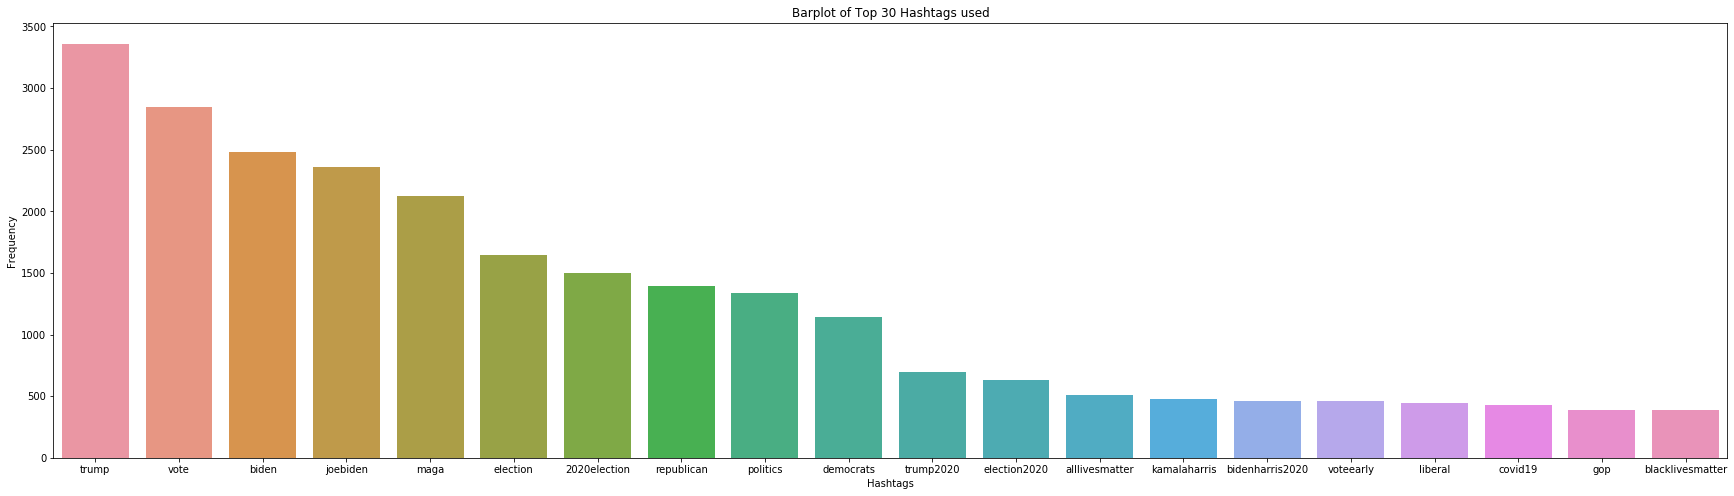

In [33]:
#Top 20 Hashtags 
top_hashtags = df_hashtag.groupby(['hashtags']).size().reset_index(name ='counts')    #Create another column to indicate the frequencies of a hashtags
top_hashtags = top_hashtags.sort_values(by = "counts", ascending = False)             #Sort the values by frequencies, ascedning orders  
print(top_hashtags.head(20))

#Countplot on the top 30 hashtags 
plt.figure(figsize=(30,8))
sns.set_palette('PuBuGn_d')
sns.barplot(x = 'hashtags', y = 'counts', data = top_hashtags.head(20))
plt.title('Barplot of Top 30 Hashtags used')
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.show()

The top 12 hashtags focus on the candidates and the election rather than anything else, it is much better to drop all of them and focus on the next top 30 batch (any hashtags that appear less than 600 times).

              hashtags  counts
261     alllivesmatter     509
3900      kamalaharris     476
790    bidenharris2020     462
7926         voteearly     462
4171           liberal     448
1683           covid19     430
3032               gop     391
914   blacklivesmatter     390
3896            kamala     349
7741               usa     330
2110       donaldtrump     325
6408            scotus     311
1963          democrat     282
4973              news     282
342    amyconeybarrett     265
293            america     246
6083       republicans     238
7881          vote2020     195
3399       hunterbiden     192
1629       coronavirus     182
3189            harris     172
2300     elections2020     157
138                acb     155
1681             covid     155
5456             pence     148
4371          maga2020     145
3890               kag     143
2289       electionday     140
5465      pennsylvania     136
1340             china     132


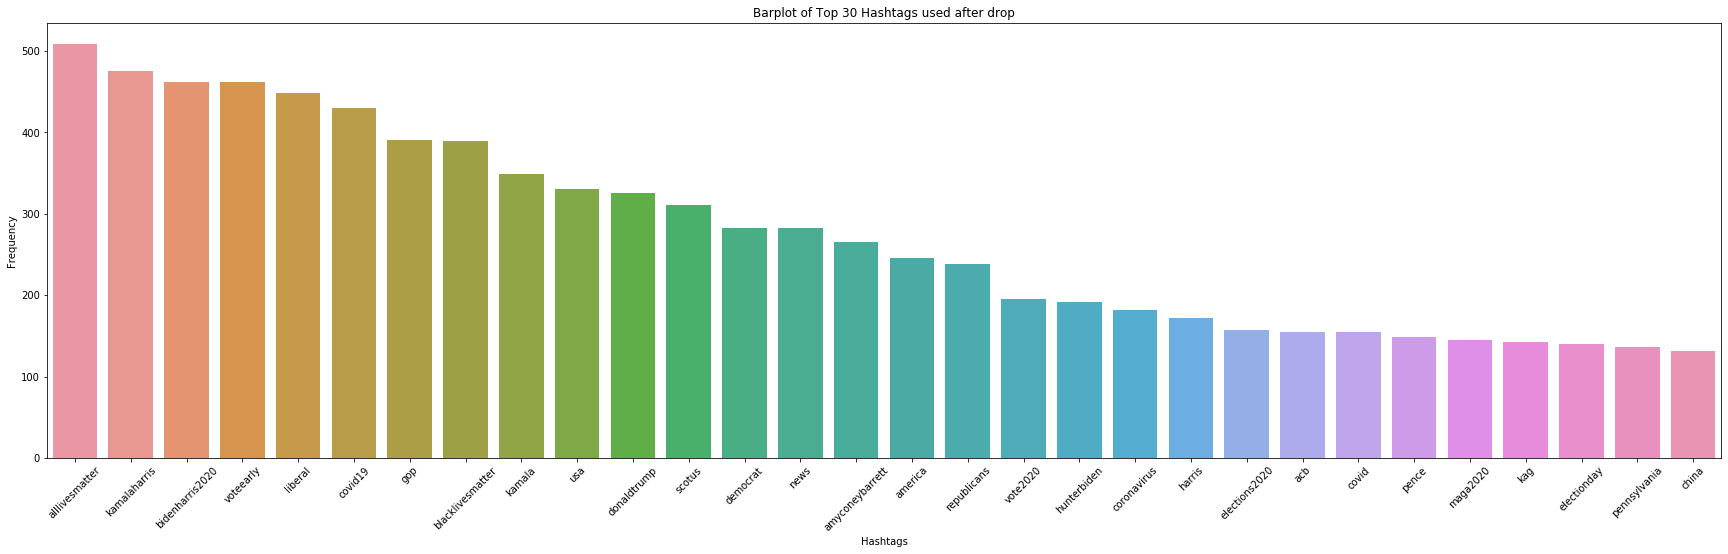

In [34]:
#Dropping the 12 first rows and take the next 30
top_hashtags_post_drop = top_hashtags[top_hashtags.counts <= 600]
print(top_hashtags_post_drop.head(30))

#Countplot on the top 30 hashtags 
plt.figure(figsize=(30,8))
sns.set_palette('PuBuGn_d')
sns.barplot(x = 'hashtags', y = 'counts', data = (top_hashtags_post_drop.head(30)))
plt.title('Barplot of Top 30 Hashtags used after drop')
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.xticks(rotation = 45)
plt.show()

After dropping, the frequency plot is much evenly distributed and skewed less drastically to the right. We also see many other topics that pop up on Twitter but to lesser frequencies compared to information about the candidates.

<font font color='blue' size="5"> **2) Most Popular Tweets** </font>

In this section, we will focus on what are the most popular tweets around. There are 2 indicators that can help us achieve this - a tweet's retweet count and favorite count. Unfortunately, we could not extract the favorite count number for each tweet since there is a problem with .json format

We will perform the following: 
1. Top N tweets of all time (in this dataset only)
2. Top N tweets for particular day
3. Top N tweets for the past T days

In [35]:
from datetime import datetime 

ind_to_drop = []
date =[]


#First find out with 'Tweet Created at' is not a string or in other weird formats 
for i in range(0, len(data)):
    ith_date_str = data.iloc[i,:]['Tweet Created at']
    ith_match = re.search(r'\d{4}-\d{2}-\d{2}', ith_date_str)
    if ith_match == None: 
        ind_to_drop.append(i)
    else: 
        continue
        
print(ind_to_drop)

[5750, 5751, 5752, 5753, 5754, 5755, 5756, 5757, 5758, 5759, 5760, 5761, 5762, 5763, 5764, 5765, 5766, 5767, 5768, 5769, 5770, 5771, 5772, 5773, 5774, 5775, 5776, 5777, 5778, 5779, 5780, 5781, 5782, 5783, 5784, 5785, 5786, 5787, 5788, 5789, 5790, 5791, 5792, 5793, 5794, 5795, 5796, 5797, 5798, 5799, 5800, 5801, 5802, 5803, 5804, 5805, 5806, 5807, 5808, 5809, 5810, 5811, 5812, 5813, 5814, 5815, 5816, 5817, 5818, 5819, 5820, 5821, 5822, 5823, 5824, 5825, 5826, 5827, 5828, 5829, 5830, 5831, 5832, 5833, 5834, 5835, 5836, 5837, 5838, 5839, 5840, 5841, 5842, 5843, 5844, 5845, 5846, 5847, 5848, 5849, 5850, 5851, 5852, 5853, 5854, 5855, 5856, 5857, 5858, 5859, 5860, 5861, 5862, 5863, 5864, 5865, 5866, 5867, 5868, 5869, 5870, 5871, 5872, 5873, 5874, 5875, 5876, 5877, 5878, 5879, 5880, 5881, 5882, 5883, 5884, 5885, 5886, 5887, 5888, 5889, 5890, 5891, 5892, 5893, 5894, 5895, 5896, 5897, 5898, 5899, 5900, 5901, 5902, 5903, 5904, 5905, 5906, 5907, 5908, 5909, 5910, 5911, 5912, 5913, 5914, 5915, 591

In [36]:
# Drop these rows using ind_to_drop
data.drop(ind_to_drop, inplace = True)


#Check the new shape
data.shape

(20159, 128)

In [37]:
# Create a new list of datetime date objects from the tweets 
for i in range(0, len(data)):
    ith_date_str = data.iloc[i,:]['Tweet Created at']
    ith_match = re.search(r'\d{4}-\d{2}-\d{2}', ith_date_str)
    ith_date = datetime.strptime(ith_match.group(), '%Y-%m-%d').date()     #datatime.strptime: Return a datetime corresponding to date_string, parsed according to format.
    
    date.append(ith_date)
    
#Size of list 'date'
print('Len of date list: ', len(date))

Len of date list:  20159


In [38]:
#Append 'date to dataframe 'date' as 'dt_date' aka 'datetime_date'
data['dt_date'] = date

In [39]:
data['dt_date'].value_counts()

2020-10-26    11635
2020-10-27     5673
2020-10-25     2206
2020-10-24      645
Name: dt_date, dtype: int64

### Top N tweets of all time (in this dataset only)

In [40]:
# Define a function that will pull out top N tweets of all time:
def alltime_top_tweets(df, N):
    # Arguments:
    # df - dataframe
    # N - top N tweets based on retweetcount
    
    # Sort according to 'retweetcount'
    top_tweets_df = df.sort_values(by = ['Num of Retweet'], ascending = False)
    # Drop also duplicates from the list, keep only the copy with higher retweetcount
    top_tweets_df.drop_duplicates(subset = 'Tweet', keep = 'first', inplace = True)
    # Keep only N rows
    top_tweets_df = top_tweets_df.head(N)
    
    print('All-time top 10 tweets:')
    # Print out only important details 
    # username, tweetcreatedts, retweetcount, original text 'text'
    return top_tweets_df[['User', 'Tweet Created at', 'Num of Retweet', 'Tweet']]

In [41]:
alltime_top_tweets(data, 10)

All-time top 10 tweets:


,User,Tweet Created at,Num of Retweet,Tweet
12621,EpochTimes,2020-10-26 18:10:01,1658,“The American people have a right to know what...
17295,cjtruth,2020-10-26 23:30:21,1371,"This is what the Fake News Media, Big Tech and..."
2326,RobertCahaly,2020-10-25 16:23:53,1272,Our new @trafalgar_group #2020Election #Battle...
3205,lauferlaw,2020-10-27 01:56:42,1181,I know the confirmation of Barrett sucks. Ther...
16359,IngrahamAngle,2020-10-27 00:52:45,860,Joe Biden hides in his basement. While Preside...
10049,Jorgensen4POTUS,2020-10-25 22:17:01,793,"Sadly, @Nickelodeon / @NickelodeonPR is compli..."
12612,ArchKennedy,2020-10-26 18:12:15,610,.@Jim_Jordan says his staff independently auth...
28610,SarahLarchmont,2020-10-26 21:17:37,580,https://t.co/vFA1XWHwQz in partnership with @P...
4630,SaraCarterDC,2020-10-26 20:25:32,536,Post-debate poll: #Trump leads #Biden by three...
1756,JavManjarres,2020-10-25 23:12:53,518,@FloridaGOP ties Kamala Harris to anti-Semitic...


### Top N tweets for particular day

In [42]:
# Define another function as well
def specified_toptweets(df, spec_date, N):
    # Arguments
    # df - dataframe
    # N - top N tweets
    # date - enter particular date in str format i.e. '2019-11-02'
    
    # Specific date
    spec_date = datetime.strptime(spec_date, '%Y-%m-%d').date()
    
    # Filter df by date first
    date_df = df[df['dt_date'] == spec_date ]
    
    # Sort according to 'retweetcount'
    top_tweets_date_df = date_df.sort_values(by = ['Num of Retweet'], ascending = False)
    # Drop also duplicates from the list, keep only the copy with higher retweetcount
    top_tweets_date_df.drop_duplicates(subset = 'Tweet', keep = 'first', inplace = True)
    # Keep only N rows
    top_tweets_date_df = top_tweets_date_df.head(N)
    
    print('Top ' + str(N) + ' tweets for date ' + str(spec_date) + ' are:')
    # Print out only important details 
    # username, tweetcreatedts, retweetcount, original text 'text'
    return top_tweets_date_df[['User', 'Tweet Created at', 'Num of Retweet', 'Tweet']]

In [43]:
specified_toptweets(data, '2020-10-27', 10)

Top 10 tweets for date 2020-10-27 are:


,User,Tweet Created at,Num of Retweet,Tweet
3205,lauferlaw,2020-10-27 01:56:42,1181,I know the confirmation of Barrett sucks. Ther...
16359,IngrahamAngle,2020-10-27 00:52:45,860,Joe Biden hides in his basement. While Preside...
16599,LouDobbs,2020-10-27 00:29:08,483,Preserving the Constitution: @TomFitton &amp; ...
16434,mikandynothem,2020-10-27 00:43:56,419,Congratulations to Justice Barrett and to @rea...
3042,JudicialWatch,2020-10-27 02:30:00,347,"""It's a FBI/DOJ cover-up. They knew that Biden..."
15843,michaeljohns,2020-10-27 01:33:56,343,.@realDonaldTrump spoke truth in #Allentown th...
16846,LouDobbs,2020-10-27 00:14:47,295,Supreme Court History: @cjscalia says he’s exc...
23927,DebraMessing,2020-10-27 02:47:13,220,#Trump is spreading lies about mail-in voting ...
23830,Alyssa_Milano,2020-10-27 03:00:18,180,Woah. Have you read this article?\n\nAll the p...
16544,ColumbiaBugle,2020-10-27 00:33:22,162,President Trump has given us the Supreme Court...


### Top N tweets for the past T days

In [44]:
# Obtain the list of unique dates again
unique_date = np.unique(date)
print('Unique dates available in this dataset are:')
print(unique_date)

Unique dates available in this dataset are:
[datetime.date(2020, 10, 24) datetime.date(2020, 10, 25)
 datetime.date(2020, 10, 26) datetime.date(2020, 10, 27)]


In [45]:
#Create a class to indicate how the word will turn out 
class color:
   BOLD = '\033[1m'
   RED = '\033[91m'
   END = '\033[0m'                        #The list on how to make the information bold from here: https://stackoverflow.com/questions/8924173/how-do-i-print-bold-text-in-python

print(color.BOLD + color.RED + 'Hello World !'+ color.END)

Hello World !


In [46]:
# Define another function, which is similar to the one from above 'visualize_top_hashtags':

def past_toptweets(df, T, N, unique_date):
    # Arguments:
    # df - dataframe 'data'
    # T - last T days 
    # N - top N tweets
    # List of all unique dates in dataset
    
    # Create a df to store top tweets for all T dates, in case there is a need to manipulate this df
    past_toptweets_df = pd.DataFrame(columns = ['User', 'Tweet Created at', 'Num of Retweet', 'Tweet'])
    print(past_toptweets_df)
    
    # Filter data according to last T dates first:
    # Do a check that T must not be greater than the no. of elements in unique_date
    if T <= len(unique_date):
        unique_date = unique_date[-T:] # a list
    else:
        raise Exception('T must be smaller than or equal to the number of dates in the dataset!')
    
    # Print out top N for each unique_date one after another, starting from the latest:
    for ith_date in reversed(unique_date):
        # Filter tweets created on this date:
        ith_date_df = df[df['dt_date'] == ith_date]
        
        # Sort according to 'retweetcount'
        top_tweets_date_df = ith_date_df.sort_values(by = [ 'Num of Retweet'], ascending = False)
        # Drop also duplicates from the list, keep only the copy with higher retweetcount
        top_tweets_date_df.drop_duplicates(subset = 'Tweet', keep = 'first', inplace = True)
        # Keep only N rows
        top_tweets_date_df = top_tweets_date_df.head(N)
        # Keep only essential columns
        top_tweets_date_df = top_tweets_date_df[['User', 'Tweet Created at', 'Num of Retweet', 'Tweet']]
        
        # Append top_tweets_date_df to past_toptweets_df
        past_toptweets_df = pd.concat([past_toptweets_df, top_tweets_date_df], axis = 0)
        
        # Print out the top tweets for this ith_date
        print('Top ' + color.BOLD + color.RED + str(N) + ' tweets '+ color.END  + ' for date ' + color.BOLD + color.RED + str(ith_date) + color.END + ' are:')
        # print only essential columns:
        print(top_tweets_date_df)
        print('\n')
    
    return past_toptweets_df

In [47]:
past_toptweets(data, T = 4, N = 5, unique_date = unique_date)

Empty DataFrame
Columns: [User, Tweet Created at, Num of Retweet, Tweet]
Index: []
Top 5 tweets  for date 2020-10-27 are:
                User     Tweet Created at  Num of Retweet  \
3205       lauferlaw  2020-10-27 01:56:42            1181   
16359  IngrahamAngle  2020-10-27 00:52:45             860   
16599       LouDobbs  2020-10-27 00:29:08             483   
16434  mikandynothem  2020-10-27 00:43:56             419   
3042   JudicialWatch  2020-10-27 02:30:00             347   

                                                   Tweet  
3205   I know the confirmation of Barrett sucks. Ther...  
16359  Joe Biden hides in his basement. While Preside...  
16599  Preserving the Constitution: @TomFitton &amp; ...  
16434  Congratulations to Justice Barrett and to @rea...  
3042   "It's a FBI/DOJ cover-up. They knew that Biden...  


Top 5 tweets  for date 2020-10-26 are:
                 User     Tweet Created at  Num of Retweet  \
12621      EpochTimes  2020-10-26 18:10:01            

,User,Tweet Created at,Num of Retweet,Tweet
3205,lauferlaw,2020-10-27 01:56:42,1181,I know the confirmation of Barrett sucks. Ther...
16359,IngrahamAngle,2020-10-27 00:52:45,860,Joe Biden hides in his basement. While Preside...
16599,LouDobbs,2020-10-27 00:29:08,483,Preserving the Constitution: @TomFitton &amp; ...
16434,mikandynothem,2020-10-27 00:43:56,419,Congratulations to Justice Barrett and to @rea...
3042,JudicialWatch,2020-10-27 02:30:00,347,"""It's a FBI/DOJ cover-up. They knew that Biden..."
12621,EpochTimes,2020-10-26 18:10:01,1658,“The American people have a right to know what...
17295,cjtruth,2020-10-26 23:30:21,1371,"This is what the Fake News Media, Big Tech and..."
12612,ArchKennedy,2020-10-26 18:12:15,610,.@Jim_Jordan says his staff independently auth...
28610,SarahLarchmont,2020-10-26 21:17:37,580,https://t.co/vFA1XWHwQz in partnership with @P...
4630,SaraCarterDC,2020-10-26 20:25:32,536,Post-debate poll: #Trump leads #Biden by three...


One flaw of this function 'past_toptweets' is that it could return tweets that are identical. For instance, a popular tweet on day 1 can be retweeted again on subsequent days by other users. As we have seen with the tweet from "Jorgensen4POTUS" or "JudicialWatch" Twitter account. This function can then pick up such tweets because no logic is implemented as of now to consider only tweets that have not been chosen from earlier dates.

<font font color='blue' size="5"> **3) Behavior of Twitter Users (# of Tweets daily)** </font>


We want to find out who are the users that have been very active in tweeting tweets related to the election 

In [48]:
top_user_df = pd.DataFrame(columns = ['User','no Tweets','no Followers','dt_date'])

#Convert datatype of 'Total Tweets by user' to numeric 
pd.to_numeric(data['Total Tweets by user'])


for ith_date in unique_date:
    print('Current loop: ', ith_date)
    
    temp = data[data['dt_date'] == ith_date]
    
    #pd.DataFrame - count number of tweets tweeted in that day ('no Tweets/day')
    temp_noTweets = temp.groupby(['User']).size().reset_index(name = 'no Tweets').sort_values(by = 'User', ascending = False)
                        #Group by the 'User' values and then put the number into the 'no Tweets/day' and then sort them by the user name order 
        
    #pd.Series - count max followers - might flurturate day after day 
    temp_noFollowing = temp.groupby(['User'])['Num of Followers'].max().reset_index(name = 'no Followers').sort_values(by = 'User', ascending = False)['no Followers']
                        #Group by the 'User' values and then put the max numer of followers into the 'no Followers' and then sort them by the user name order
    
    # Concat series to temp_noTweets, which will be the main df
    final = pd.concat([temp_noTweets, temp_noFollowing], axis = 1) # add as columns
    final['dt_date'] = ith_date
    
    print(final)
    
    #Append the 'final' dataframe to the top_user_df
    top_user_df = pd.concat([top_user_df, final])

Current loop:  2020-10-24
                User  no Tweets  no Followers     dt_date
518          yagbebi          1          4553  2020-10-24
517        xoxoLizza          1         30078  2020-10-24
516         wtmuiche          1            14  2020-10-24
515  worldnewsdotcom          1         20647  2020-10-24
514    wisaapi4biden          1           151  2020-10-24
..               ...        ...           ...         ...
4         877CallLaw          2            29  2020-10-24
3        77WABCradio          1         14349  2020-10-24
2        4bnewsworld          1            26  2020-10-24
1          30seconds          5         29438  2020-10-24
0      1DannyStewart          1           510  2020-10-24

[519 rows x 4 columns]
Current loop:  2020-10-25
                User  no Tweets  no Followers     dt_date
1678      zoe_land30          1            42  2020-10-25
1677    ziggyhaskins          1          1455  2020-10-25
1676        ziggens1          1           755  2020-10

In [49]:
print('Top_user_df by numer of tweets is: ')
print(top_user_df.sort_values(by = 'no Tweets', ascending = False))

Top_user_df by numer of tweets is: 
               User no Tweets no Followers     dt_date
1799   RandalPaster        85         6615  2020-10-27
746      CM23623745        52           45  2020-10-26
3304    mattgreenjr        39          228  2020-10-27
4440  Starbright489        38          123  2020-10-26
1510       ErinMH90        35         1743  2020-10-26
...             ...       ...          ...         ...
5523      badwolf70         1          910  2020-10-26
5521    babyleelu10         1           69  2020-10-26
5520       bOwtoole         1          191  2020-10-26
5519        azu_rbd         1           10  2020-10-26
0     001Assistants         1           11  2020-10-27

[14698 rows x 4 columns]


In [50]:
#Eliminate all the ones that tweet only once in a day 
index_names = top_user_df[ (top_user_df['no Tweets'] == 1)].index 
top_user_df.drop(index_names, inplace = True)

top_user_df

,User,no Tweets,no Followers,dt_date
1613,trumpedupagain,6,19,2020-10-25
1206,foo_benjamin,3,6339,2020-10-25
1135,conserv_tribune,5,74649,2020-10-25
947,UCSUSA,2,72549,2020-10-25
850,ShoppingCoups,2,895,2020-10-25
...,...,...,...,...
1206,KyaJeena,3,21,2020-10-27
1135,JuanCZarateM,2,8,2020-10-27
947,IdontInvets,2,39,2020-10-27
850,GogartyKay,2,2140,2020-10-27


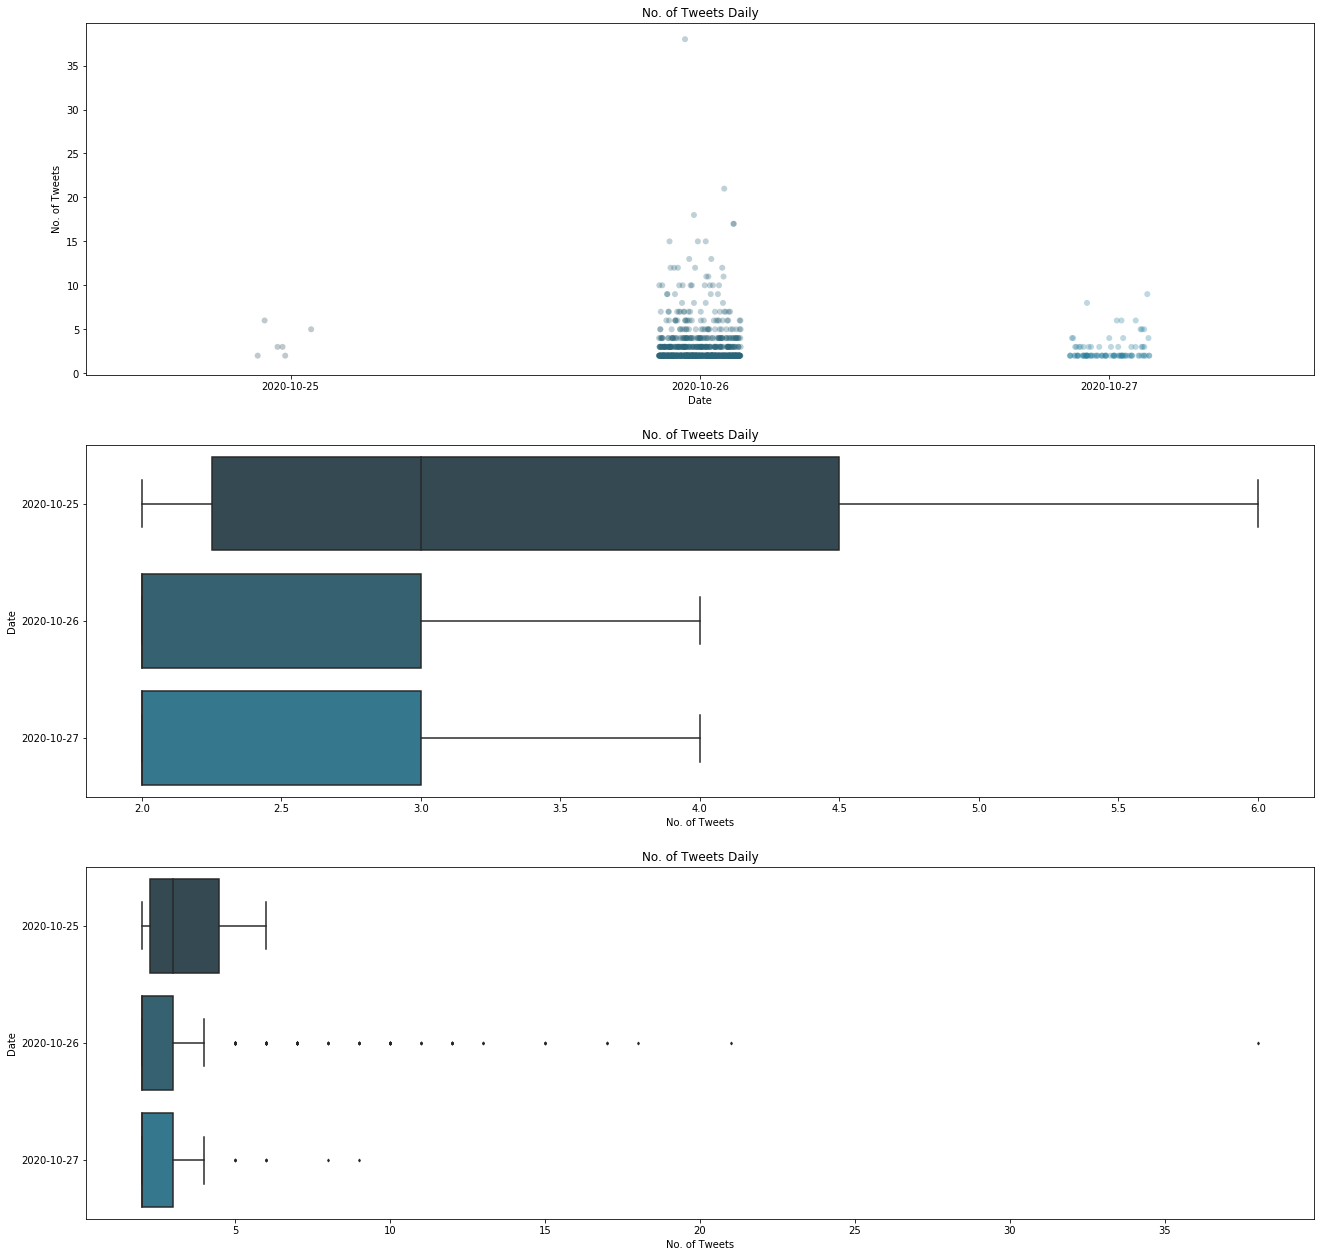

In [51]:
# hue = retweetcount and followers, totaltweets
f, axes = plt.subplots(3, 1, figsize = (22,22))
sns.set_palette('PuBuGn_d')
sns.stripplot(x = 'dt_date', y = 'no Tweets', data = top_user_df, jitter = True, ax = axes[0], size = 6, alpha = 0.3)
sns.boxplot(y = 'dt_date', x = 'no Tweets', data = top_user_df, orient = 'h', showfliers=False, ax = axes[1])
sns.boxplot(y = 'dt_date', x = 'no Tweets', data = top_user_df, orient = 'h', showfliers=True, fliersize = 2.0, ax = axes[2])

# Axes and titles for each subplot
axes[0].set_xlabel('Date')
axes[0].set_ylabel('No. of Tweets')
axes[0].set_title('No. of Tweets Daily')

axes[1].set_xlabel('No. of Tweets')
axes[1].set_ylabel('Date')
axes[1].set_title('No. of Tweets Daily')

axes[2].set_xlabel('No. of Tweets')
axes[2].set_ylabel('Date')
axes[2].set_title('No. of Tweets Daily')

plt.show()

As we see that the majortiy (around 13000) of Twitter accounts only tweet once/day about the Election, while only 7% accounts tweet remain hyper active. 
From the first strip plot, we can initially assume that Oct 26th is the most active day as users Tweet around 2-25 times on that day, with one exception of 35. However, the middle boxplot dispproved that perception by showing that on average, Oct 26th and Oct 27th have an average around 4 tweets/ user, 2 tweets fewer than average compared to 24th. The last panel explained the discrepancy in interpretation results between first and second by highlighting the fact the Oct 26 is a special day with many outliners that bulk up the actual average number of the tweets per day for an account. 

**Oct 26th, 2020 is so special for Twitter Election observers due to many events that happened percifically on that day** ( https://www.cbsnews.com/video/102620-cbs-evening-news/ ):
1. Pennsylvania is the last rally place for both Trump and Biden before the election on November 3rd. Pennsylvania has volatile Elections Voting history with either side claiming victory with big margin of difference (https://www.270towin.com/states/Pennsylvania )
2. Second White House COVID outbreak, yet former Vice President Pence still campained despite having 5 of his closest staffs placed under quarantine. ( https://www.nytimes.com/2020/10/26/us/politics/covid-pence-white-house.html )
3. <font font color='red' size="3"> **BREAKING** </font> : Amy Coney Barrett was confirmed to Supreme Court, took Constitutional Oath on the same day. The acceptance has generated a massive storm as she was hand-picked by President Donald Trump. This could also explained the surge of popularity of these hashtags: **#AmyConeyBarrett,#acb, #SCOTUS.**  ( https://www.npr.org/2020/10/26/927640619/senate-confirms-amy-coney-barrett-to-the-supreme-court )


In [52]:
# Dataframe - Example of someone who tweeted the most:
# obtain username of this user first - we are using Oct 26th 
top_user_name = top_user_df[top_user_df['dt_date'].apply(lambda x: x.day) == 26].sort_values(by = 'no Tweets', ascending=False)['User'].head(1).values[0]
print("Top user on Oct 26th is:",top_user_name)


# Obtain this particular username and the first top tweets by this user from the main dataframe 'data'
pd.set_option('display.max_colwidth', -1)
data[data['User'] == top_user_name][['User','Tweet','Tweet Created at']].head(30)

Top user on Oct 26th is: Starbright489


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,User,Tweet,Tweet Created at
8746,Starbright489,#Trump &amp; #COV1919 ..VS...Our SURVIVAL\n\nWe MUST Defeat him\n\nMost important #Election of a #Lifetime\nThank you… https://t.co/uZQd5rLgHw,2020-10-26 21:01:01
8747,Starbright489,#Trump &amp; #COV1919 ..VS...Our SURVIVAL\n\nWe MUST Defeat him\n\nMost important #Election of a #Lifetime\nThank you… https://t.co/ZH9pcQfypj,2020-10-26 21:00:58
8753,Starbright489,#Trump &amp; #COV1919 ..VS...Our SURVIVAL\n\nWe MUST Defeat him\n\nMost important #Election of a #Lifetime\nThank you… https://t.co/ICy0HWL2gt,2020-10-26 20:56:16
8754,Starbright489,#Trump &amp; #COV1919 ..VS...Our SURVIVAL\n\nWe MUST Defeat him\n\nMost important #Election of a #Lifetime\nThank you… https://t.co/6NZQjtQJAl,2020-10-26 20:56:14
8762,Starbright489,#Trump &amp; #COV1919 ..VS...Our SURVIVAL\n\nWe MUST Defeat him\n\nMost important #Election of a #Lifetime\nThank you… https://t.co/x2rYC3gHcw,2020-10-26 20:52:07
8763,Starbright489,#Trump &amp; #COV1919 ..VS...Our SURVIVAL\n\nWe MUST Defeat him\n\nMost important #Election of a #Lifetime\nThank you… https://t.co/7oordR4oTB,2020-10-26 20:52:04
8775,Starbright489,#Trump &amp; #COV1919 ..VS...Our SURVIVAL\n\nWe MUST Defeat him\n\nMost important #Election of a #Lifetime\nThank you… https://t.co/ivo4w5Owjk,2020-10-26 20:45:57
8776,Starbright489,#Trump &amp; #COV1919 ..VS...Our SURVIVAL\n\nWe MUST Defeat him\n\nMost important #Election of a #Lifetime\nThank you… https://t.co/AFOpJssUIG,2020-10-26 20:45:53
8786,Starbright489,#Trump &amp; #COV1919 ..VS...Our SURVIVAL\n\nWe MUST Defeat him\n\nMost important #Election of a #Lifetime\nThank you… https://t.co/5OJXtEW1w0,2020-10-26 20:40:58
8787,Starbright489,#Trump &amp; #COV1919 ..VS...Our SURVIVAL\n\nWe MUST Defeat him\n\nMost important #Election of a #Lifetime\nThank you… https://t.co/8wUHECPerT,2020-10-26 20:40:55


From the result above and picture below, we can see that the account could likely be a fake one given to the fact that it tweeted the same thing over and over again on Oct 26th, 2020. Since the account is situated in Pennsylvania, it is likely that this individual is trigued by the election which in turn promt him/her to take such drastic action  

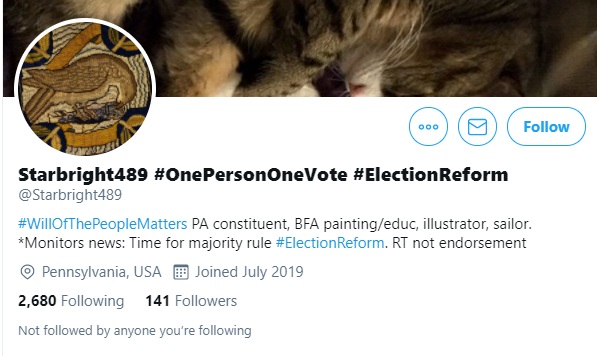

<font font color='blue' size="5"> **4) Demographics of Twitter Users** </font>

### Locaton of Twitter users

In [53]:
# See how many unique locations we have
location = data['Location']
print('No. of distinct locations listed by Twitter users is: ', len(location.value_counts()))

#Remove n.a
unique_locations = location.value_counts()
unique_locations = pd.DataFrame({'locations': unique_locations.index,
                                'count': unique_locations.values})
unique_locations.drop(0,inplace = True)

#See top few locations 
unique_locations.sort_values(by = 'count', ascending = False).head(20)

No. of distinct locations listed by Twitter users is:  4819


,locations,count
1,united states,678
2,usa,376
3,"new york, ny",208
4,"washington, dc",205
5,"los angeles, ca",188
6,"california, usa",160
7,"florida, usa",153
8,"pennsylvania, usa",138
9,"new york, usa",105
10,"chicago, il",90


It is interesting to see that there is a location "rpaster1160@gmail.com" classified above. After little digging, it turned out that the user himself wrongfully filled the location detail with his email address as shown in the picture below. Thus, it is much better to eliminate these locations as it could reduce the quality of our research

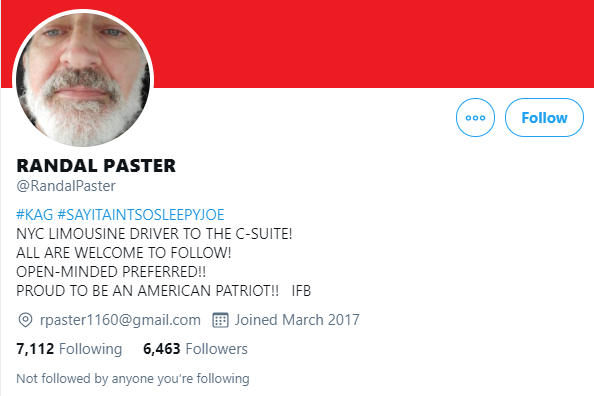

Pretty natural to expect many of these users to claim to be residing in USA since these users are probably closer to the ground. Thus, they could spread news quickly from what they see in person.

We will discount 'USA' from the visualization and focus on the distribution of the remaining locations:

In [54]:
# Obtain the row index of locations that contain USA and rpaster1160@gmail.com :
ind_1 = unique_locations[unique_locations['locations'] == 'united states'].index.values[0]
ind_2 = unique_locations[unique_locations['locations'] == 'usa'].index.values[0]
ind_3 = unique_locations[unique_locations['locations'] == 'rpaster1160@gmail.com'].index.values[0]


list_ind = [ind_1,ind_2,ind_3]

# Drop these rows from unique_locations
unique_loc_temp = unique_locations.drop(list_ind)

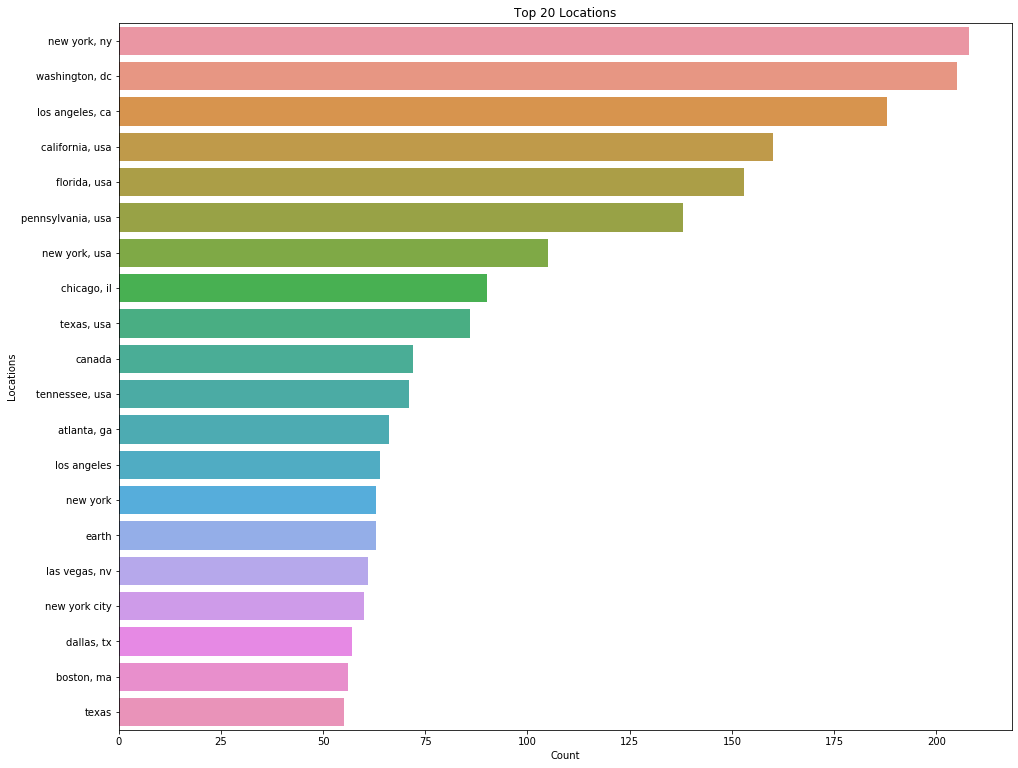

In [55]:
# Focus on top 20 locations first
# Convert any possible str to int/numeric first
count = pd.to_numeric(unique_loc_temp['count'])
unique_loc_temp['count'] = count
unique_loc_temp = unique_loc_temp.head(20)

# Plot a bar plot
plt.figure(figsize=(16,13))
sns.set_palette('PuBuGn_d')
sns.barplot(x = 'count', y = 'locations', orient = 'h',data = unique_loc_temp)
plt.xlabel('Count')
plt.ylabel('Locations')
plt.title('Top 20 Locations')
plt.show()

It is interesting to see that on the contrary to many claims by [the media](https://www.msn.com/en-ca/news/canada/america-votes-2020-worlds-eyes-on-us-election/vi-BB1azWCX), the majority f these locations come from within the United with one notiable exception being Canada. Thus, it is safe to say that US affair is strictly domestic with no more international attention than any other events across the globe


### Follower Count

In [56]:
# Reuse code from top_user_df
# Sort according to noFollowers
top_user_df = top_user_df.sort_values(by = 'no Followers', ascending = False)
user_most_followers = top_user_df.groupby('User')['no Followers', 'dt_date'].max().sort_values(by = 'no Followers', ascending = False)
user_most_followers['User'] = user_most_followers.index
user_most_followers.reset_index(inplace = True, drop = True)
user_most_followers

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


,no Followers,dt_date,User
0,6488047,2020-10-26,the_hindu
1,979088,2020-10-26,dumbassgenius
2,948422,2020-10-26,moneycontrolcom
3,588674,2020-10-26,khaleejtimes
4,551220,2020-10-26,THEHermanCain
...,...,...,...
918,0,2020-10-26,MissRed80614542
919,0,2020-10-26,CentersRandall
920,0,2020-10-26,kJM6ngaN8
921,0,2020-10-26,Ckensington2


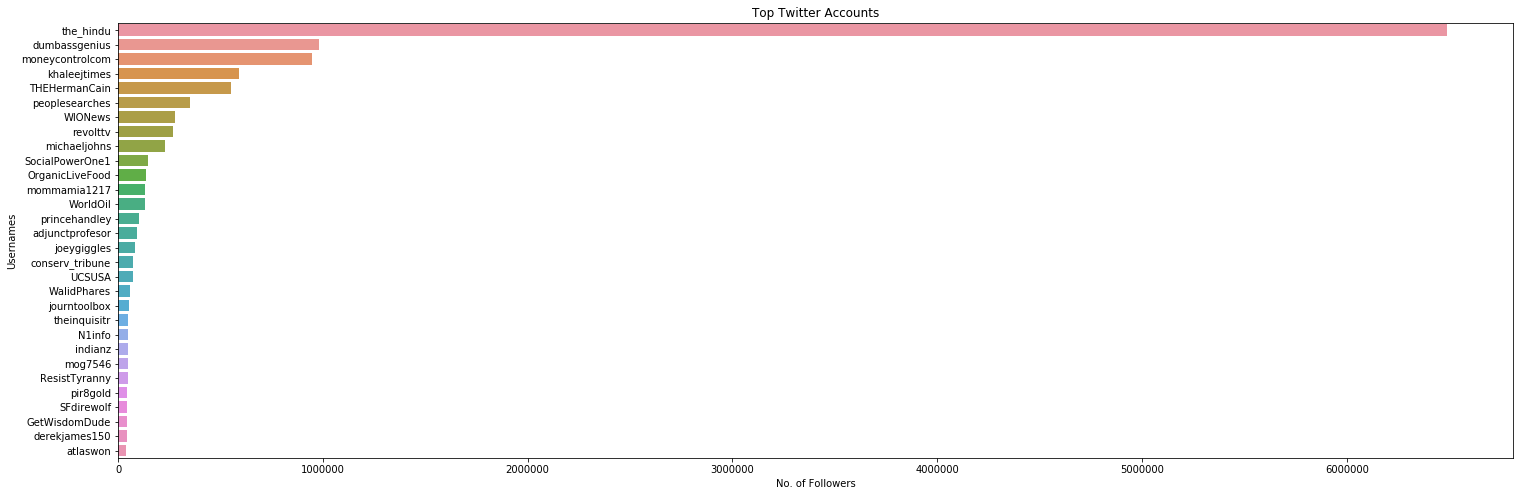

In [57]:
# plot
plt.figure(figsize = (25, 8))
sns.set_palette('PuBuGn_d')
sns.barplot(x = 'no Followers', y = 'User', orient = 'h', data = user_most_followers.head(30))
plt.xlabel('No. of Followers')
plt.ylabel('Usernames')
plt.title('Top Twitter Accounts')
plt.show()

<font font color='blue' size="5"> **5) Most Mentioned Username** </font>

Might there be figureheads besides Trump and Biden that can be discovered in these tweets? Twitter users might be tagging these people to maybe inform them of events that are happening on the ground and hence, require their attentions. These figureheads or prominent figures might be lawyers, lawmakers, politicians, reporters that have strong influence on this election =.

In [58]:
def find_users(df):
    # df: dataframe to look at
    # returns a list of usernames
    
    # Create empty list
    list_users = []
    
    for i in range(0, len(df)):
        users_ith_text = re.findall('@[^\s]+', df.iloc[i,:]['Tweet'])
        # returns a list
        # append to list_users by going through a for-loop:
        for j in range(0, len(users_ith_text)):
            list_users.append(users_ith_text[j])
    
    return list_users

In [59]:
# Apply on dataframe data['text']
list_users = find_users(data)

mentioned_users_df = pd.DataFrame({
    'mentioned_users': list_users
})

mentioned_users_df

,mentioned_users
0,@VoterFeed_USA
1,@SenCortezMasto
2,@SenJeffMerkley
3,@SenJackyRosen
4,@USSupremeCourt
...,...
12166,@senatemajldr
12167,@CornynResponse
12168,@JohnCornyn
12169,@mjhegar


In [60]:
#Group all the mentioned by frequencies 
mentionedusers_before = mentioned_users_df.groupby('mentioned_users').size().reset_index(name = 'totalcount').sort_values(by = 'totalcount', ascending = False)

#Dropping @realDonaldTrump, @JoeBiden and Trump's current account as he is holding office 
mentionedusers_before1 = mentionedusers_before[mentionedusers_before.mentioned_users != '@realDonaldTrump']
mentionedusers_before2 = mentionedusers_before1[mentionedusers_before1.mentioned_users != '@JoeBiden']
mentionedusers = mentionedusers_before2[mentionedusers_before2.mentioned_users != '@POTUS']

mentionedusers

,mentioned_users,totalcount
1477,@KamalaHarris,181
1157,@HillaryClinton,169
3136,@YouTube,150
28,@270toWin,136
1011,@GOP,121
...,...,...
1821,"@MichaelSteele,",1
1822,@MichaelThau,1
1823,@MichaelWolffNYC,1
1824,@MicheleRiester,1


In [61]:
mentionedusers.head(15)

,mentioned_users,totalcount
1477,@KamalaHarris,181
1157,@HillaryClinton,169
3136,@YouTube,150
28,@270toWin,136
1011,@GOP,121
474,@CNN,92
4576,@senatemajldr,85
3090,@WhiteHouse,84
2189,@ProjectLincoln,78
1235,@IvankaTrump,68


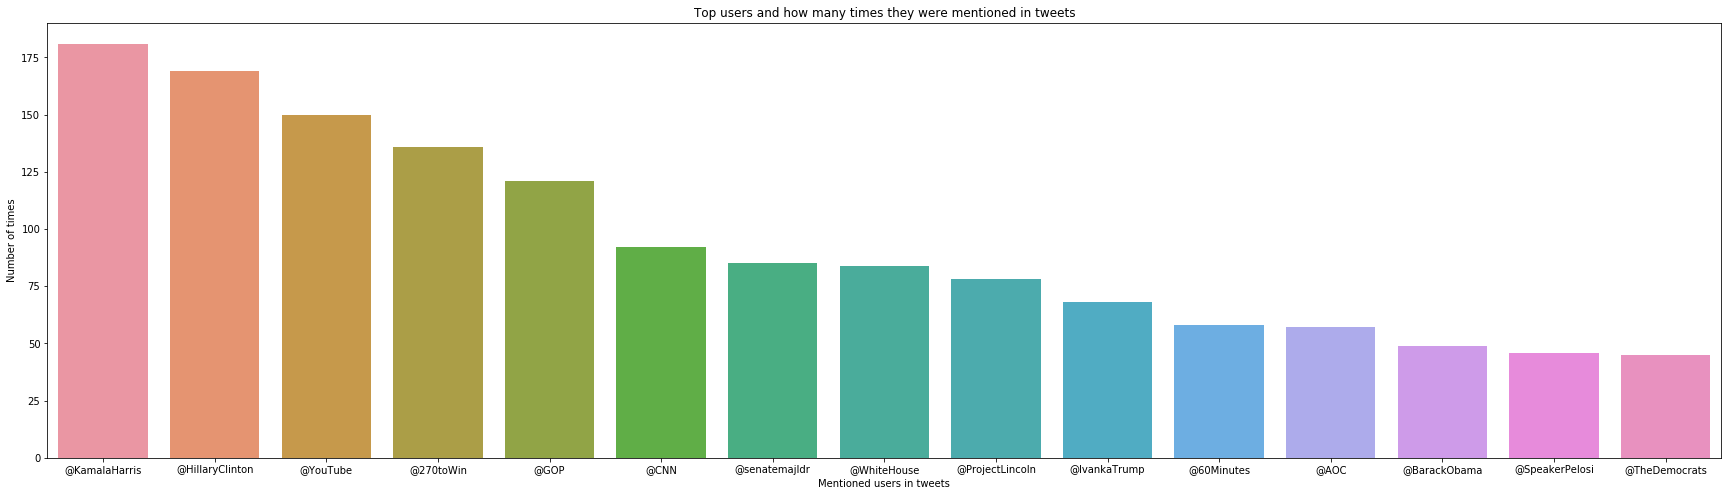

In [62]:
#Plot
plt.figure(figsize=(30,8))
sns.set_palette('PuBuGn_d')
sns.barplot(x = 'mentioned_users', y = 'totalcount', data = mentionedusers.head(15))
plt.xlabel('Mentioned users in tweets')
plt.ylabel('Number of times')
plt.title('Top users and how many times they were mentioned in tweets')
plt.show()

Suprisingly, the majority of the 15 most mentioned users are pro Biden (8 for, 3 against, 4 neutral). The neutral ones are either social media giant like Youtube or nonpartisan project like 270towin. Here are the run down of some notable Twitter accounts that caught my attention:

1. <font font color='blue' size="2"> **@HillaryClinton** </font> - 2016 Democratic Nominee that lost to Donald Trump. Now she is the founder of Onward Together, a political action organization dedicated to fundraising for progressive political groups
2. <font font color='blue' size="2"> **@ProjectLincoln** </font> - an American political action committee formed in late 2019 by a number of Republicans and former Republicans. It aimed to prevent the re-election of Donald Trump and defeat all Republicans in close races running for re-election in the United States Senate
3. <font font color='red' size="2"> **@senatemajldr** </font> - Addison Mitchell McConnell Jr., currently serving as Kentucky's senior United States senator and as the Senate majority leader. Senate Republicans, under McConnell's leadership, broke records on the number of judicial nominees confirmed; among those nominees were Neil Gorsuch, Brett Kavanaugh and Amy Coney Barrett who were confirmed to the Supreme Court.
4. <font font color='blue' size="2"> **@AOC** </font> - Alexandria Ocasio-Cortez is the youngest woman ever to serve in the United States Congress, taking office at age 29. She has been noted for her substantial social media presence relative to her fellow members of Congress. She advocates a progressive platform that includes Medicare for All, a federal jobs guarantee, the Green New Deal and abolishing the U.S. Immigration and Customs Enforcement (ICE).
5. <font font color='red' size="2"> **@IvankaTrump** </font> - American businesswoman, serving since 2017 as Advisor to the President, her father Donald Trump, and the Director of the Office of Economic Initiatives and Entrepreneurship. In her role, she focuses on the education and economic empowerment of women and their families as well as job creation and economic growth through workforce development, skills training and entrepreneurship.
6. <font font color='blue' size="2"> **@SpeakerPelosi** </font> -  Speaker of the United States House of Representatives.  During her first speakership, she was instrumental in the passage of many of the Obama administration's landmark bills:  Affordable Care Act, the Dodd–Frank Wall Street Reform and Consumer Protection Act, the Don't Ask, Don't Tell Repeal Act, the American Recovery and Reinvestment Act, and the 2010 Tax Relief Act.

With the above bar chart, we have come to the end of this section where we have visualized information from tweets in the dataset.


<font font color='blue' size="5"> **6) Wordcloud- Popular words for the Election, Trump and Biden** </font>


In [63]:
#For the Election
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 100,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

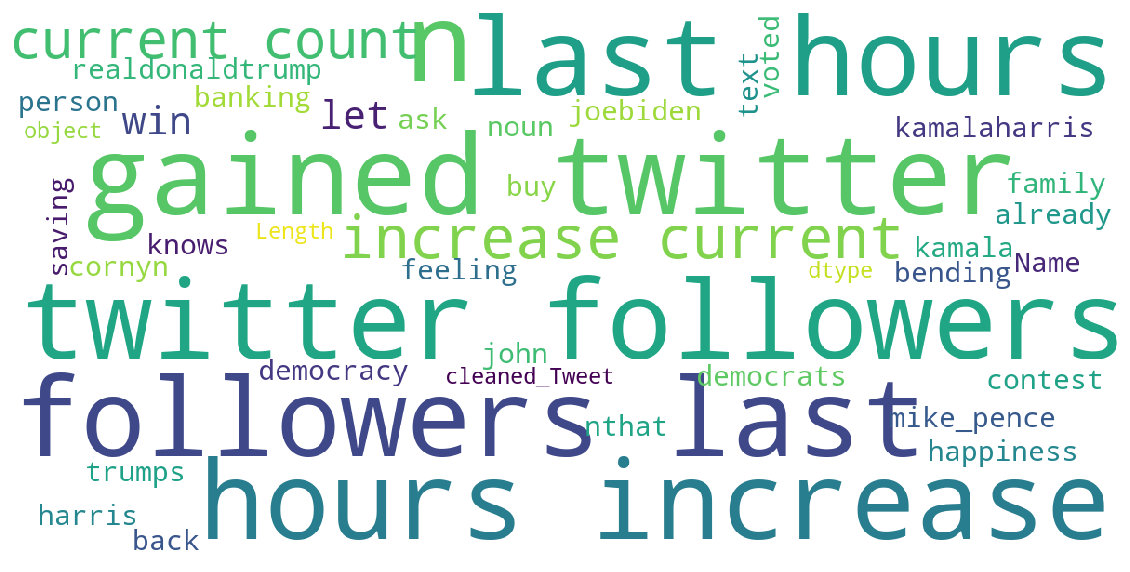

In [64]:
show_wordcloud(data['cleaned_Tweet'])

####  Expected Vocbulary

Looking at the wordcloud, it is very interesting to see that there are not that many words that indicate strong or weak emotioncal connotation with. The most common words are just random like justrandom (twitter, followers, contest,etc.)

Outdated as more trweets are taken into consieration: Interestingly, 'hapiness" appears in the wordcloud. But as of now, it still remains to what or who is mentioned or associated numerously with good. So we should need to dig a little bit deeper  

In [65]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Rows that mention Trump or Biden
data_trump = data[data['cleaned_Tweet'].str.contains("trump", "republican")]
data_biden = data[data['cleaned_Tweet'].str.contains("biden", "democrats")]

#WordCloud for Trump
def Trump_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 100,
        max_font_size = 40,
        random_state = 42,
        color_func=lambda *args, **kwargs: "red"
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
    
#WordCloud for Biden
def Biden_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 100,
        max_font_size = 40,
        random_state = 42,
        color_func=lambda *args, **kwargs: "blue"
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

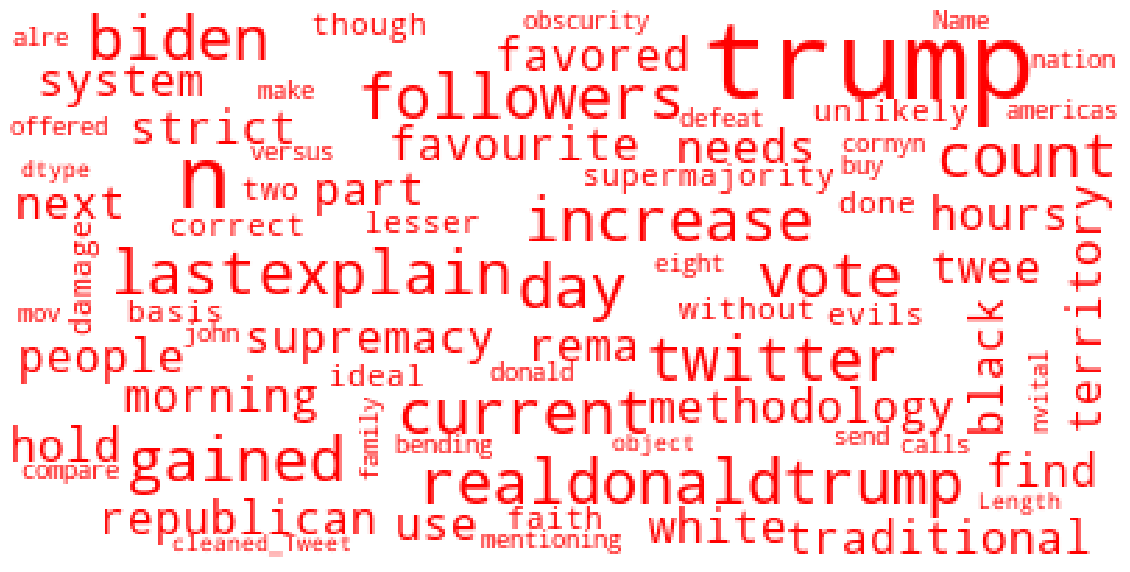

In [66]:
Trump_wordcloud(data_trump['cleaned_Tweet'])

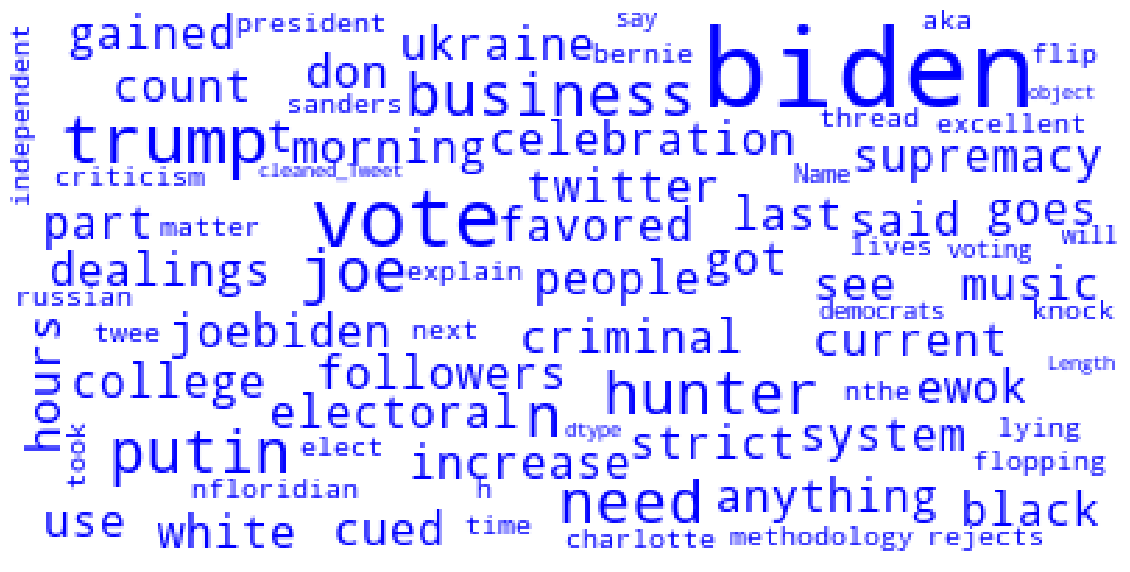

In [67]:
Biden_wordcloud(data_biden['cleaned_Tweet'])

From a respective point of view, there are no words that really stand out from the crowd between these two candidates. It is also interesting to see that both sides include the other's name (Trump on Biden's, Biden on Trump's) so much so to the point that they become the 2nd or 3rd popular words on each sides respectively. This could mean that either one is menioned as an afterthought or comparison when the user critizises/ praises his opponnent. As one of the political theorists pointed out, Biden oriented tweets's common words are very typical for an American politician (Putin, dealing, college, lying,etc.). While the Trump oriented ones are on par with his brand (supremacy, traditional, white,etc. )

======================================================================================================================

======================================================================================================================

======================================================================================================================

<font font color='black' size="5"> **Export the database** </font>

In [68]:
data

,User,Location,Tweet,Num of Friend,Num of Followers,Total Tweets by user,Account Created at,Tweet Created at,Num of Retweet,hashtags in the tweet,...,word_way,word_week,word_white,word_win,word_wins,word_world,word_year,word_years,word_yes,dt_date
0,thekumachan,n.a,Kamala Harris Knows How to Win Contest\nhttps://t.co/8uSOBP6yBd\n\n#2020Campaign #2020Election #Amateur #Biden2020… https://t.co/TlluGuKzec,23,60,4218,2009-08-21 22:01:59,2020-10-26 23:00:31,0,"[2020campaign, 2020election, amateur, biden2020]",...,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,2020-10-26
1,2020Followers,washington d.c.,"realDonaldTrump gained 3,412 Twitter followers in the last 6 hours, for a 0.0039% increase, with a current count of… https://t.co/Z3FXzB0EHM",1,31,6642,2019-12-30 23:45:24,2020-10-26 23:00:21,0,[],...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,2020-10-26
2,2020Followers,washington d.c.,"JoeBiden gained 11,515 Twitter followers in the last 6 hours, for a 0.0996% increase, with a current count of 11,56… https://t.co/m9mbW0Jrbm",1,31,6642,2019-12-30 23:45:24,2020-10-26 23:00:21,0,[],...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,2020-10-26
3,2020Followers,washington d.c.,"Mike_Pence gained 1,684 Twitter followers in the last 6 hours, for a 0.0308% increase, with a current count of 5,47… https://t.co/OjICTqCZFl",1,31,6642,2019-12-30 23:45:24,2020-10-26 23:00:21,0,[],...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,2020-10-26
4,2020Followers,washington d.c.,"KamalaHarris gained 7,302 Twitter followers in the last 6 hours, for a 0.1055% increase, with a current count of 6,… https://t.co/GSbrIJ7yPx",1,31,6642,2019-12-30 23:45:24,2020-10-26 23:00:21,0,[],...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,2020-10-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29042,ByDionne,n.a,💚🙌😀🥳😇🙏Let's Win This!! #VoteEarly #VOTE Let's GET BACK UP? https://t.co/MlPNhvSlp7,2961,1743,10803,2012-05-07 12:29:39,2020-10-26 21:02:58,0,"[voteearly, vote]",...,0.0,0.0,0.0,0.455499,0.0,0.0,0.0,0.0,0.0,2020-10-26
29043,Iamjasbirkaur,"olney, md",Saving democracy! \n#VOTE #VoteHimOut2020 #VoteBidenHarris2020 \nhttps://t.co/NltV7mA43g,622,359,3432,2014-07-19 15:43:08,2020-10-26 21:02:56,0,"[vote, votehimout2020, votebidenharris2020]",...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,2020-10-26
29044,enelson6,n.a,@CornynResponse @JohnCornyn @mjhegar #Vote @mjhegar - John Cornyn is too buy bending over for Trumps family.,1057,413,21866,2009-01-02 12:22:53,2020-10-26 21:02:54,0,[vote],...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,2020-10-26
29045,ethannichtern,n.a,Happiness: Noun. \n\nThat feeling where you are text banking and you ask a person who has already voted for Democrats… https://t.co/kxs8HGvS7k,939,13441,27261,2009-03-11 21:56:10,2020-10-26 21:02:53,1,[],...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,2020-10-26


In [69]:
data.to_csv(os.getcwd() + '/data/' + '/Final_Data.csv', index = False)